In [25]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [26]:
img = cv2.imread('cat.jpg')

In [27]:
cv2.imshow('image', img)
# 等待时间,毫秒级，0代表任意键终止
cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:
def cv_show(name, image):
    cv2.imshow('image', image)
    # 等待时间
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [29]:
img.shape

(414, 500, 3)

In [30]:
img = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)
cv_show('image', img)

In [31]:
img.shape

(414, 500)

In [32]:
cv2.imwrite('gray_cat.png', img)

True

In [33]:
# 读取视频流
vc = cv2.VideoCapture("地球.mp4")

In [34]:
if vc.isOpened():
    # 按帧读取
    open, frame = vc.read()
else:
    open = False

In [35]:
while open:
    ret, frame = vc.read()
    if frame is None:
        break
    if ret == True:
        gray = cv2.cvtColor(frame, cv2.IMREAD_GRAYSCALE)
        cv2.imshow('result', gray)
        if cv2.waitKey(10) & 0xFF == 27:
            break
vc.release()
cv2.destroyAllWindows()

## 截取部分图像数据

In [36]:
img = cv2.imread('cat.jpg')
cat = img[0:10, 0:20]
cv_show('cat', cat)

In [37]:
b, g, r = cv2.split(cat)

In [38]:
b

array([[142, 146, 151, 150, 142, 130, 119, 113, 109, 100,  98, 104, 105,
         96,  87,  81,  91, 103, 117, 120],
       [108, 112, 118, 119, 117, 111, 108, 106, 100,  97, 101, 105, 103,
         95,  95,  97, 109, 123, 139, 146],
       [108, 110, 118, 119, 122, 121, 125, 124, 118, 121, 130, 129, 124,
        116, 123, 130, 143, 150, 161, 164],
       [139, 141, 148, 148, 151, 149, 152, 152, 154, 159, 168, 165, 160,
        152, 157, 158, 164, 166, 172, 168],
       [153, 156, 163, 164, 165, 161, 162, 160, 174, 176, 183, 183, 185,
        181, 178, 172, 167, 167, 169, 165],
       [155, 159, 165, 168, 167, 166, 165, 165, 173, 176, 179, 183, 192,
        197, 192, 182, 172, 169, 165, 162],
       [158, 160, 163, 165, 164, 165, 167, 170, 168, 170, 171, 174, 185,
        197, 197, 188, 178, 172, 164, 158],
       [157, 157, 157, 155, 154, 156, 161, 165, 163, 166, 165, 163, 172,
        187, 193, 188, 176, 170, 162, 158],
       [162, 163, 164, 166, 168, 169, 169, 170, 167, 164, 163, 1

## 边界填充

In [39]:
# 上下左右的填充大小
top_size, bottom_size, left_size, right_size = (50, 50, 50, 50)

replicate = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_CONSTANT, value=0)

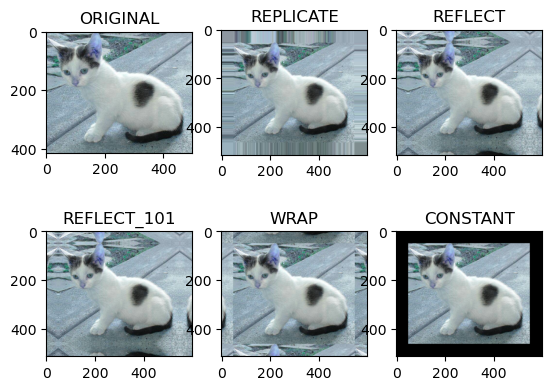

In [40]:
import matplotlib.pyplot as plt

plt.subplot(231), plt.imshow(img, 'gray'), plt.title('ORIGINAL')
plt.subplot(232), plt.imshow(replicate, 'gray'), plt.title('REPLICATE')
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.title('REFLECT')
plt.subplot(234), plt.imshow(reflect101, 'gray'), plt.title('REFLECT_101')
plt.subplot(235), plt.imshow(wrap, 'gray'), plt.title('WRAP')
plt.subplot(236), plt.imshow(constant, 'gray'), plt.title('CONSTANT')

plt.show()

- BORDER_REPLICATE：复制法，也就是复制最边缘像素。
- BORDER_REFLECT：反射法，对感兴趣的图像中的像素在两边进行复制例如：fedcba|abcdefgh|hgfedcb
- BORDER_REFLECT_101：反射法，也就是以最边缘像素为轴，对称，gfedcb|abcdefgh|gfedcba
- BORDER_WRAP：外包装法cdefgh|abcdefgh|abcdefg
- BORDER_CONSTANT：常量法，常数值填充。

## 图像融合

In [41]:
img_cat = cv2.imread('cat.jpg')
img_dog = cv2.imread('dog.jpg')
img_cat + img_dog

ValueError: operands could not be broadcast together with shapes (414,500,3) (429,499,3) 

In [42]:
img_cat.shape

(414, 500, 3)

In [43]:
cv_show('image',img_cat)

In [44]:
img_dog.shape

(429, 499, 3)

In [45]:
# 大小不相同不能直接数值加法
img_dog = cv2.resize(img_dog, (500, 414))
img_dog.shape

(414, 500, 3)

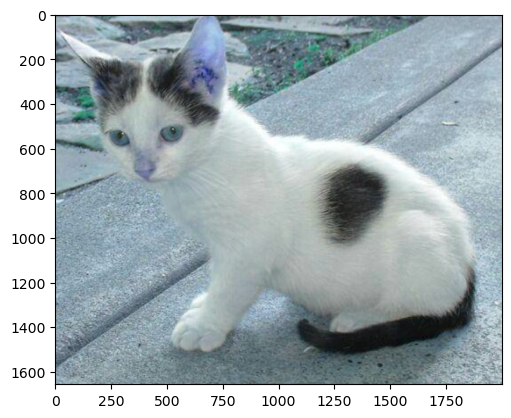

In [46]:
res = cv2.resize(img_cat, (0, 0), fx=4, fy=4)
plt.imshow(res)  # 不指定具体大小，指定x，y的倍数关系

In [47]:
res.shape

(1656, 2000, 3)

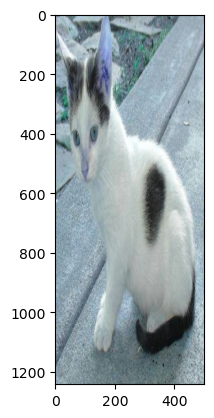

In [48]:
res = cv2.resize(img_cat, (0, 0), fx=1, fy=3)
plt.imshow(res)
cv_show('image',res)

In [ ]:
res = cv2.addWeighted(img_cat, 0.4, img_dog, 0.6, 0)  # αX + βY + b
plt.imshow(res)